# 03 - pLDDT

Statistics about predicted Local Distance Difference Test (pLDDT), which is a useful assessment of whether a prediction is good or not- 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
chain_plddt = pd.read_csv('../structures/chain-reference.csv')
reference = pd.read_csv('../structures/reference.csv')
chain_plddt = pd.merge(reference, chain_plddt, on='id')

In [3]:
chain_plddt

,original_name,id,stochiometry,average_pLDDT,taxond_id,lineage,scientific_name,is_ancestral,nitrogenase_type,status,chain_reference,variant,clade,chain,pLDDT,subunit,sequence
0,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,A,92.792897,D,MGKTKKIELDKFREAVVGKYPTKVGRKRAKAIINNDPDNIPQIQAN...
1,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,D,92.844668,D,MGKTKKIELDKFREAVVGKYPTKVGRKRAKAIINNDPDNIPQIQAN...
2,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,E,96.807211,K,MLLRHTTPKEIDRKALTINPAKTCQPVGAMYAALGLHGCLPHSHGS...
3,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,B,96.819390,K,MLLRHTTPKEIDRKALTINPAKTCQPVGAMYAALGLHGCLPHSHGS...
4,Nif_Desulfohalovibrio_alkalitolerans_001.recha...,nsdb-000002,DDKK,94.695321,NaN,NaN,Desulfohalovibrio alkalitolerans,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,D,92.871833,D,MATKSKKQKSLTPDEVRQELIKKYPPKVARKRAKQIQANTGDEAST...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16089,Anc_1486_alt4_001.rechained.pdb,nsdb-005366,HH,87.068425,Anc_1486_alt4,Anc_1486_alt4,Anc_1486_alt4,True,Anc,silver,"{'A': 'H', 'B': 'H'}",ALT4,other,A,87.078352,H,MRQVAIYGKGGIGKSTTTQNLTAALAEMGKKIMVVGCDPKADSTRL...
16090,Anc_1464_alt2_001.rechained.pdb,nsdb-005367,HH,87.755495,Anc_1464_alt2,Anc_1464_alt2,Anc_1464_alt2,True,Anc,silver,"{'A': 'H', 'B': 'H'}",ALT2,other,A,87.712015,H,MRQVAIYGKGGIGKSTTTQNLNAGLGEMGKKIMIVGCDPKADSTRL...
16091,Anc_1464_alt2_001.rechained.pdb,nsdb-005367,HH,87.755495,Anc_1464_alt2,Anc_1464_alt2,Anc_1464_alt2,True,Anc,silver,"{'A': 'H', 'B': 'H'}",ALT2,other,B,87.798974,H,MRQVAIYGKGGIGKSTTTQNLNAGLGEMGKKIMIVGCDPKADSTRL...
16092,Anc_1532_alt4_001.rechained.pdb,nsdb-005368,HH,91.320916,Anc_1532_alt4,Anc_1532_alt4,Anc_1532_alt4,True,Anc,silver,"{'A': 'H', 'B': 'H'}",ALT4,other,B,91.432418,H,MRRIAIYGKGGIGKSTTTQNLTAALSTMDKHILQIGCDPKADSTRM...


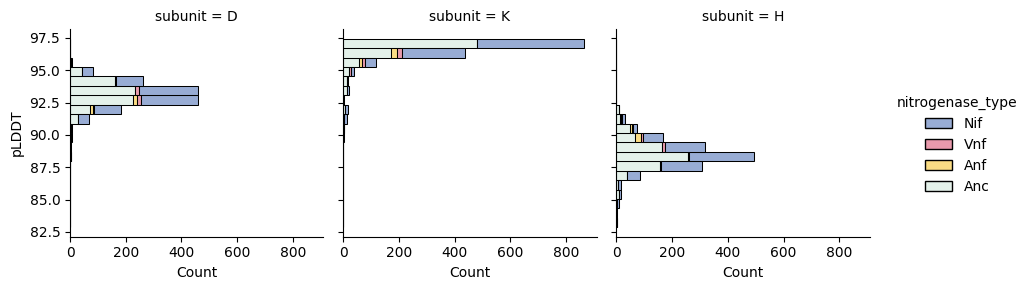

In [4]:
palette = {
    'Anc': '#DCEDE4',
    'Nif': '#7690C6', 
    'Vnf': '#E17891',
    'Anf': '#F9D15B',
}
g = sns.displot(
    y='pLDDT', col='subunit', 
    data=chain_plddt.query('status == "gold"'), height=3.0, bins=20, aspect=1.0, 
    hue='nitrogenase_type', multiple='stack', palette=palette
)
# g.savefig('../figures/ddkk-histogram-pLDDT.png', dpi=300)
# g.savefig('../figures/ddkk-histogram-pLDDT.svg')

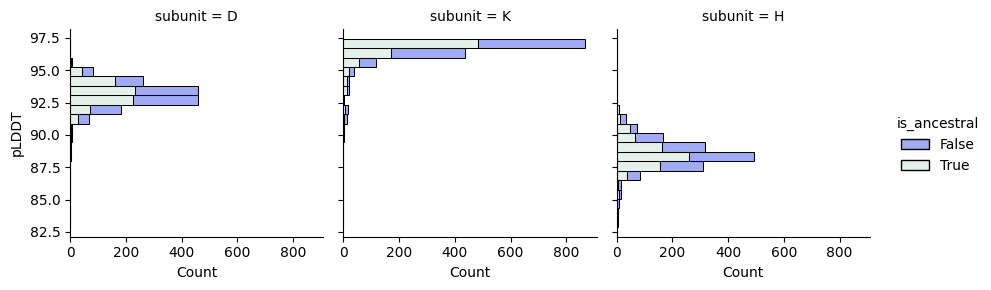

In [5]:
palette = {
    True: '#DCEDE4',
    False: '#818EF2', 

}
g = sns.displot(
    y='pLDDT', col='subunit', 
    data=chain_plddt.query('status == "gold"'), height=3.0, bins=20, aspect=1.0, 
    hue='is_ancestral', multiple='stack', palette=palette
)
g.savefig('../figures/ddkk-histogram-pLDDT-isAnc.png', dpi=300)
g.savefig('../figures/ddkk-histogram-pLDDT-isAnc.svg')

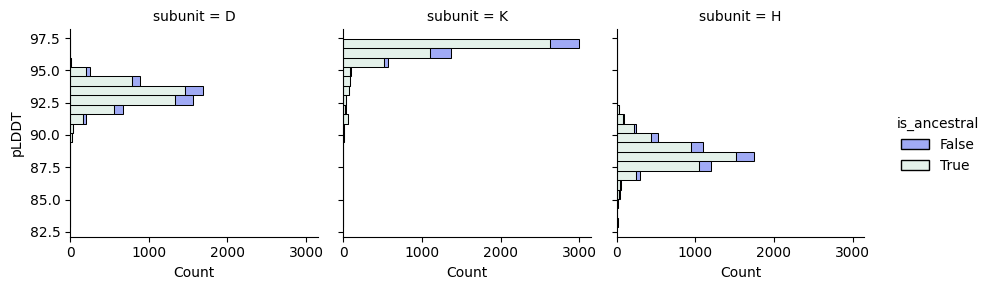

In [6]:
palette = {
    True: '#DCEDE4',
    False: '#818EF2', 

}
g = sns.displot(
    y='pLDDT', col='subunit', 
    data=chain_plddt, height=3.0, bins=20, aspect=1.0, 
    hue='is_ancestral', multiple='stack', palette=palette
)
# g.savefig('../figures/ddkk-histogram-pLDDT-isAnc.png', dpi=300)
# g.savefig('../figures/ddkk-histogram-pLDDT-isAnc.svg')

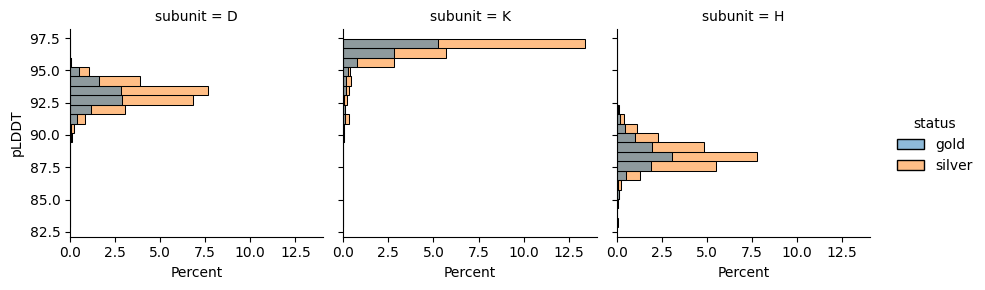

In [7]:

g = sns.displot(
    y='pLDDT', col='subunit', 
    data=chain_plddt, height=3.0, bins=20, aspect=1.0, 
    hue='status', stat='percent'
)
# g.savefig('../figures/ddkk-histogram-pLDDT-isAnc.png', dpi=300)
# g.savefig('../figures/ddkk-histogram-pLDDT-isAnc.svg')

In [20]:
chain_plddt

,original_name,id,stochiometry,average_pLDDT,taxond_id,lineage,scientific_name,is_ancestral,nitrogenase_type,status,chain_reference,variant,clade,chain,pLDDT,subunit,sequence
0,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,A,92.792897,D,MGKTKKIELDKFREAVVGKYPTKVGRKRAKAIINNDPDNIPQIQAN...
1,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,D,92.844668,D,MGKTKKIELDKFREAVVGKYPTKVGRKRAKAIINNDPDNIPQIQAN...
2,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,E,96.807211,K,MLLRHTTPKEIDRKALTINPAKTCQPVGAMYAALGLHGCLPHSHGS...
3,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,B,96.819390,K,MLLRHTTPKEIDRKALTINPAKTCQPVGAMYAALGLHGCLPHSHGS...
4,Nif_Desulfohalovibrio_alkalitolerans_001.recha...,nsdb-000002,DDKK,94.695321,NaN,NaN,Desulfohalovibrio alkalitolerans,False,Nif,gold,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,nif-ii,D,92.871833,D,MATKSKKQKSLTPDEVRQELIKKYPPKVARKRAKQIQANTGDEAST...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15017,Anc_1330_alt5_001.rechained.pdb,nsdb-004830,HH,89.503276,Anc_1330_alt5,Anc_1330_alt5,Anc_1330_alt5,True,Anc,silver,"{'A': 'H', 'B': 'H'}",ALT5,other,B,89.532287,H,MALRQCAIYGKGGIGKSTTTQNLVAALAEAGKKVMIVGCDPKADST...
15018,Anc_1441_alt4_001.rechained.pdb,nsdb-004831,HH,87.845876,Anc_1441_alt4,Anc_1441_alt4,Anc_1441_alt4,True,Anc,silver,"{'A': 'H', 'B': 'H'}",ALT4,other,B,87.831350,H,MRKIAIYGKGGIGKSTTTQNTVAGLAEMGKKVMVVGCDPKADSTRL...
15019,Anc_1441_alt4_001.rechained.pdb,nsdb-004831,HH,87.845876,Anc_1441_alt4,Anc_1441_alt4,Anc_1441_alt4,True,Anc,silver,"{'A': 'H', 'B': 'H'}",ALT4,other,A,87.860401,H,MRKIAIYGKGGIGKSTTTQNTVAGLAEMGKKVMVVGCDPKADSTRL...
15020,Anc_1255_alt2_001.rechained.pdb,nsdb-004832,HH,87.462095,Anc_1255_alt2,Anc_1255_alt2,Anc_1255_alt2,True,Anc,silver,"{'A': 'H', 'B': 'H'}",ALT2,other,B,87.439392,H,MSKLRQIAFYGKGGIGKSTTSQNTLAALVEMGQKILIVGCDPKADS...
